In [ ]:

import pandas as pd
from generator import Constraint
from difficulty import DifficultyEstimator, DifficultyLevel
from utils import *
from preprocessing import Preprocessor

# Ensure we're running in the right directory
chdir_this_file()


FIELD_SIZE = 3
MIN_CELL_SIZE = 1
MAX_CELL_SIZE = None

language = "en"

countries = pd.read_json(f"../../public/data/countries/countries-{language.lower()}.json", encoding="utf8")
preprocessor = Preprocessor(countries=countries,
                            language=language,
                            field_size=FIELD_SIZE,
                            min_cell_size=MIN_CELL_SIZE,
                            max_cell_size=MAX_CELL_SIZE)

constraints = [
    # Some categories are pretty boring to appear multiple times
    Constraint.category_at_most("capital_ending_letter", 1),
    Constraint.category_at_most("capital_starting_letter", 1),
    Constraint.category_at_most("ending_letter", 1),
    # Limit the number of cells a country can appear in
    *Constraint.solutions_at_most(countries.iso.tolist(), 3)
]
category_probs = {
    'continent': 4,
    'starting_letter': 3,
    'ending_letter': 1.5,
    'capital_starting_letter': 2,
    'capital_ending_letter': .5,
    'flag_colors': 3,
    'landlocked': 2,
    'island': 2,
    'top_20_population': 2.5,
    'bottom_20_population': 2,
    'top_20_area': 2.5,
    'bottom_20_area': 2,
    'elevation_sup5k': 2.5,
    'elevation_sub1k': 2,
}

generator = preprocessor.get_generator(constraints, category_probs,
                                       seed=None, selection_mode="shuffle_setkeys", uniform=False, shuffle=True)
games = list(generator.sample_games(n=5000))

# Difficulty computation
estimator = DifficultyEstimator(preprocessor)
difficulty_info = estimator.compute_game_difficulties(games)

# Save games to JSON file
preprocessor.save_games(games, name="elev-pop")


Removed 16 category sets
contents: 191
retain: 191
No countries to remove
Generated 91 sets and 3492 cells


  0%|                                                                                                                                      | 0/5000 [00:00<?, ?it/s]

Retained 1863 cells (of size 1-None)
Generate 5000 games...


  4%|████▉                                                                                                                       | 197/5000 [00:43<20:05,  3.98it/s]

In [2]:
games[0].data

{'max_cell_difficulty': 5.849056651947264,
 'avg_cell_difficulty': 4.513776174040688,
 'difficulty_level': 'hard'}

## From `game_stats.ipynb`

In [34]:
import matplotlib.pyplot as plt
import numpy as np

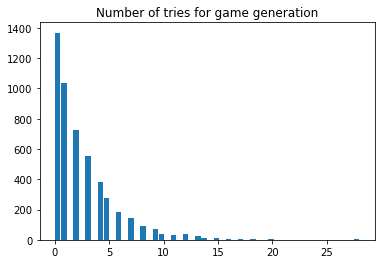

In [36]:
plt.hist([game.sample_tries for game in games], bins=50, rwidth=.9)
plt.title("Number of tries for game generation")
plt.show()

In [37]:
# sample_tries = pd.Series([game.sample_tries for game in games]).value_counts()
# sample_tries = np.array([sample_tries.get(i, 0) for i in range(100)])
# p = (1 - sample_tries / np.roll(np.where(sample_tries != 0, sample_tries, np.nan), 1))[1:]
# plt.scatter(x=p, y=np.zeros_like(p))
# plt.show()

In [38]:
difficulty_info["max_occurences"] = difficulty_info["game"].apply(lambda game: pd.Series(sum(sum(game.solutions, []), [])).value_counts().max())
difficulty_info["max_occurences"].describe()

count    5000.000000
mean        2.379600
std         0.487392
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: max_occurences, dtype: float64

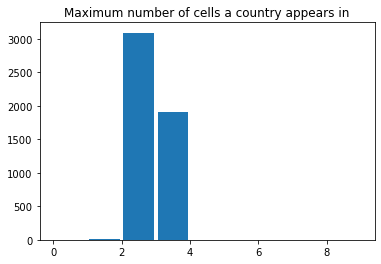

In [39]:
plt.hist(difficulty_info["max_occurences"], bins=range(10), rwidth=.9)
plt.title("Maximum number of cells a country appears in")
plt.show()

In [40]:
difficulty_info

,game,rows,cols,cell_indices,cell_difficulties,max_cell_difficulty,avg_cell_difficulty,num_unique,difficulty,difficulty_order,level,max_occurences
0,<game.Game object at 0x000002D151D74C10>,"[(elevation_sub1k, True), (island, True), (bot...","[(starting_letter, G), (continent, AS), (flag_...","[529, 140, 1766, 525, 135, 1760, 527, 138, 1764]","[5.499967345900208, 3.511109865394066, 3.72312...",7.241258,4.640019,2,4.674319,70,hard,3
1,<game.Game object at 0x000002D151D74C70>,"[(capital_starting_letter, P), (bottom_20_popu...","[(continent, NA), (landlocked, True), (flag_co...","[243, 1446, 1444, 265, 1818, 1804, 266, 1819, ...","[4.923304870475073, 4.835779094982939, 2.86449...",6.743873,4.321298,0,3.411358,59,medium,2
2,<game.Game object at 0x000002D151D74E80>,"[(landlocked, True), (continent, NA), (ending_...","[(elevation_sup5k, True), (top_20_population, ...","[1821, 1817, 1820, 268, 264, 267, 949, 945, 948]","[4.521474452191861, 4.124696344696373, 6.68761...",6.687614,4.335680,1,3.772262,59,medium,2
3,<game.Game object at 0x000002D151D74C40>,"[(island, True), (top_20_area, True), (elevati...","[(continent, EU), (flag_colors, Orange), (star...","[206, 1783, 601, 209, 1786, 603, 211, 1788, 604]","[3.034528917332578, 4.4366366519773335, 4.7073...",4.707342,3.367567,3,2.717362,15,medium,2
4,<game.Game object at 0x000002D151D74D00>,"[(elevation_sup5k, True), (flag_colors, White)...","[(continent, SA), (continent, NA), (flag_color...","[348, 268, 1788, 343, 261, 1780, 349, 269, 1789]","[3.368869553852321, 2.7626658009117335, 4.0327...",7.501932,3.834106,1,3.519783,36,medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,<game.Game object at 0x000002D1544C3310>,"[(flag_colors, Green), (bottom_20_population, ...","[(flag_colors, Orange), (continent, OC), (land...","[1767, 302, 1771, 1785, 308, 1818, 1786, 309, ...","[3.367550179489042, 6.095545109391417, 3.70609...",8.262941,5.220244,3,6.050211,87,hard,2
4996,<game.Game object at 0x000002D1544C35B0>,"[(capital_starting_letter, W), (island, True),...","[(top_20_population, True), (continent, AF), (...","[1534, 41, 184, 1823, 65, 206, 1828, 68, 209]","[2.077376373959609, 4.686083626603109, 2.93109...",4.744170,3.013372,3,2.342244,6,medium,2
4997,<game.Game object at 0x000002D1544C3850>,"[(ending_letter, U), (landlocked, True), (flag...","[(bottom_20_population, True), (flag_colors, R...","[1210, 1205, 1212, 1818, 1792, 1820, 1785, 177...","[8.722519369622631, 4.92213497365549, 8.973999...",8.974000,6.537670,2,7.389891,99,hard,3
4998,<game.Game object at 0x000002D1544C34C0>,"[(capital_starting_letter, K), (capital_ending...","[(elevation_sup5k, True), (island, True), (fla...","[1355, 1350, 1345, 1674, 1670, 1664, 1829, 182...","[5.034671809822134, 5.528645590623047, 4.08348...",5.528646,4.031301,0,2.648795,45,medium,2


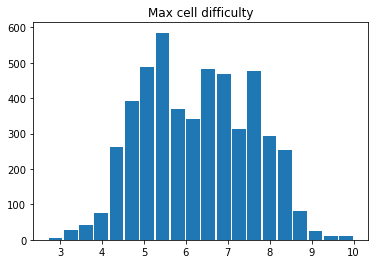

In [41]:
plt.hist(difficulty_info["max_cell_difficulty"], bins=20, rwidth=.9)
plt.title("Max cell difficulty")
plt.show()

In [42]:
for game in difficulty_info.nlargest(20, "max_cell_difficulty")["game"]:
    print(game.data)
    display(game.to_dataframe(solution=True))

{'max_cell_difficulty': 10.0, 'avg_cell_difficulty': 5.936091158043833, 'difficulty_level': 'hard'}


,Island Nation,Landlocked,Ending letter: U
Capital ending letter: I,"KM,TV","CF,RW",TV
Capital starting letter: B,"BB,BN,KN","AZ,CF,CH,HU,KG,ML,RS,SK,(BI)",GW
Top 20 Area,"ID,(AU)","KZ,MN,TD",PE


{'max_cell_difficulty': 10.0, 'avg_cell_difficulty': 6.617860465711227, 'difficulty_level': 'hard'}


,Flag color: Orange,Landlocked,Ending letter: U
Mountain over 5000m,"BT,IN","AF,BO,BT,KG,KZ,NP,TJ,UG",PE
Capital ending letter: I,IN,"CF,RW",TV
Bottom 20 Area,MH,"AD,LI,SM","NR,PW,TV"


{'max_cell_difficulty': 9.657551055410446, 'avg_cell_difficulty': 5.38332449546579, 'difficulty_level': 'hard'}


,Capital ending letter: I,Island Nation,Landlocked
Bottom 20 Population,TV,"AG,BB,DM,GD,KI,KN,LC,MH,NR,PW,SC,TO,TV,VC,VU,WS","AD,LI,SM"
Asia,"AE,IN,VN","BH,BN,ID,JP,LK,MV,PH,SG,TW","AF,AM,AZ,BT,KG,KZ,LA,MN,NP,TJ,TM,UZ"
Capital starting letter: H,"FI,VN","CU,SB",ZW


{'max_cell_difficulty': 9.657551055410446, 'avg_cell_difficulty': 5.393435575196182, 'difficulty_level': 'hard'}


,Island Nation,Top 20 Population,Bottom 20 Population
Capital ending letter: I,"KM,TV","IN,VN",TV
N. America,"AG,BB,BS,CU,DM,DO,GD,HT,JM,KN,LC,TT,VC","MX,US","AG,BB,DM,GD,KN,LC,VC"
Africa,"KM,MG,MU,SC","CD,EG,ET,NG",SC


{'max_cell_difficulty': 9.657551055410446, 'avg_cell_difficulty': 7.185555345754641, 'difficulty_level': 'hard'}


,Island Nation,Bottom 20 Area,Bottom 20 Population
Capital starting letter: V,"MT,SC","LI,MT,SC","LI,SC"
Flag color: Black,"AG,BB,BN,BS,DM,JM,KN,LC,PG,TT,VU","AG,BB,KN,LC","AG,BB,DM,KN,LC,VU"
Capital ending letter: I,"KM,TV",TV,TV


{'max_cell_difficulty': 9.657551055410446, 'avg_cell_difficulty': 5.797886455508763, 'difficulty_level': 'hard'}


,Capital ending letter: I,Landlocked,Ending letter: O
Top 20 Population,"IN,VN",ET,"CD,MX"
Starting letter: K,"KE,KM","KG,KZ,XK",XK
Bottom 20 Population,TV,"AD,LI,SM","MC,SM"


{'max_cell_difficulty': 9.657551055410446, 'avg_cell_difficulty': 6.053842814741868, 'difficulty_level': 'hard'}


,Starting letter: R,Bottom 20 Population,Top 20 Population
Capital ending letter: I,RW,TV,"IN,VN"
Landlocked,RW,"AD,LI,SM",ET
Ending letter: O,CG,"MC,SM","CD,MX"


{'max_cell_difficulty': 9.657551055410446, 'avg_cell_difficulty': 5.974238604941092, 'difficulty_level': 'hard'}


,Europe,Bottom 20 Population,Landlocked
No mountains over 1000m,"BE,BY,DK,EE,LT,LU,LV,MC,MD,MT,NL,SM","AG,BB,GD,KI,LC,MC,MH,NR,PW,SC,SM,TV","BF,BY,LU,MD,PY,SM"
Capital starting letter: V,"LI,LT,MT","LI,SC","LA,LI"
Capital ending letter: I,FI,TV,"CF,RW"


{'max_cell_difficulty': 9.657551055410446, 'avg_cell_difficulty': 7.355588803369955, 'difficulty_level': 'hard'}


,Starting letter: G,Capital ending letter: I,Capital starting letter: A
No mountains over 1000m,"GD,GH,GM,GW",TV,"GH,NL,PY"
Bottom 20 Area,GD,TV,AD
Bottom 20 Population,GD,TV,"AD,WS"


{'max_cell_difficulty': 9.657551055410446, 'avg_cell_difficulty': 6.1088816338472185, 'difficulty_level': 'hard'}


,Landlocked,No mountains over 1000m,Bottom 20 Population
Capital ending letter: I,"CF,RW",TV,TV
Flag color: Black,"AF,BW,LS,MW,SS,SZ,UG,ZM,ZW","AG,BB,BE,BS,EE,GH,GW,KW,LC,TT","AG,BB,DM,KN,LC,VU"
Flag color: Green,"AF,AZ,BF,BI,BO,BY,CF,ET,HU,LS,ML,MW,NE,RW,SS,T...","BF,BJ,BY,GD,GH,GM,GW,KW,LT,MR,MU,MV,SC,SN,TG,(...","DM,GD,KN,SC,VC,VU,(SM)"


{'max_cell_difficulty': 9.657551055410446, 'avg_cell_difficulty': 5.336445115197001, 'difficulty_level': 'hard'}


,Island Nation,Capital ending letter: I,Landlocked
Africa,"KM,MG,MU,SC","CF,DJ,KE,KM,RW","BF,BI,BW,CF,ET,LS,ML,MW,NE,RW,SS,SZ,TD,UG,ZM,ZW"
Top 20 Population,"ID,JP,PH","IN,VN",ET
Bottom 20 Population,"AG,BB,DM,GD,KI,KN,LC,MH,NR,PW,SC,TO,TV,VC,VU,WS",TV,"AD,LI,SM"


{'max_cell_difficulty': 9.657551055410446, 'avg_cell_difficulty': 4.873835798655475, 'difficulty_level': 'hard'}


,Europe,Bottom 20 Population,Mountain over 5000m
Flag color: Black,"AL,BE,DE,EE","AG,BB,DM,KN,LC,VU","AF,KE,TZ,UG,(EC)"
Capital ending letter: I,FI,TV,"IN,KE"
Ending letter: N,"AL,BE,BG,CY,CZ,ES,HR,HU,IT,LI,LT,MK,NO,PL,RO,R...","LI,MH,SC,VC","AF,AR,BO,BT,CO,GE,IN,IR,KG,KZ,PK,TJ,US"


{'max_cell_difficulty': 9.60129246728762, 'avg_cell_difficulty': 4.907219539089345, 'difficulty_level': 'hard'}


,Island Nation,Bottom 20 Area,Top 20 Area
Capital ending letter: I,"KM,TV",TV,IN
Asia,"BH,BN,ID,JP,LK,MV,PH,SG,TW","BH,MV,SG","CN,ID,IN,IR,KZ,MN,SA,(RU)"
Starting letter: P,"PG,PH,PW",PW,PE


{'max_cell_difficulty': 9.60129246728762, 'avg_cell_difficulty': 5.947421876951949, 'difficulty_level': 'hard'}


,Ending letter: R,Capital ending letter: I,Capital starting letter: B
Mountain over 5000m,"EC,MM","IN,KE","AR,CO,KG"
Bottom 20 Area,SG,TV,"BB,KN"
No mountains over 1000m,"QA,SG",TV,"BB,BE,GM,GW"


{'max_cell_difficulty': 9.60129246728762, 'avg_cell_difficulty': 4.928777129235533, 'difficulty_level': 'hard'}


,Island Nation,Capital starting letter: K,Capital ending letter: I
Top 20 Area,"ID,(AU)","CD,SD",IN
Bottom 20 Area,"AG,BB,BH,GD,KN,LC,MH,MT,MV,NR,PW,SC,SG,TO,TV,VC",VC,TV
Top 20 Population,"ID,JP,PH","CD,EG","IN,VN"


{'max_cell_difficulty': 9.60129246728762, 'avg_cell_difficulty': 5.456842611359423, 'difficulty_level': 'hard'}


,Capital ending letter: I,Flag color: Green,Europe
Bottom 20 Area,TV,"GD,KN,MV,SC,VC,(SM)","AD,LI,MC,MT,SM"
Island Nation,"KM,TV","CY,DM,GD,IE,JM,KM,KN,LK,MG,MU,MV,SB,SC,VC,VU,(HT)","CY,GB,IE,IS,MT"
Landlocked,"CF,RW","AF,AZ,BF,BI,BO,BY,CF,ET,HU,LS,ML,MW,NE,RW,SS,T...","AD,AT,BY,CH,CZ,HU,LI,LU,MD,MK,RS,SK,SM,XK,(AM,AZ)"


{'max_cell_difficulty': 9.60129246728762, 'avg_cell_difficulty': 5.1436940998159155, 'difficulty_level': 'hard'}


,Top 20 Population,Capital starting letter: B,Bottom 20 Area
Flag color: Green,"BD,BR,ET,IN,IR,MX,NG,PK","AZ,BR,CF,CG,GM,GW,HU,IQ,KN,LB,ML,(BI,BZ,ZA)","GD,KN,MV,SC,VC,(SM)"
Africa,"CD,EG,ET,NG","CF,CG,GM,GW,ML,(BI,ZA)",SC
Capital ending letter: I,"IN,VN",CF,TV


{'max_cell_difficulty': 9.60129246728762, 'avg_cell_difficulty': 5.772709127886241, 'difficulty_level': 'hard'}


,No mountains over 1000m,Landlocked,Bottom 20 Area
Asia,"BH,KW,MV,QA,SG","AF,AM,AZ,BT,KG,KZ,LA,MN,NP,TJ,TM,UZ","BH,MV,SG"
Africa,"BF,BJ,GH,GM,GW,MR,MU,SC,SN,TG","BF,BI,BW,CF,ET,LS,ML,MW,NE,RW,SS,SZ,TD,UG,ZM,ZW",SC
Capital ending letter: I,TV,"CF,RW",TV


{'max_cell_difficulty': 9.60129246728762, 'avg_cell_difficulty': 6.124260071891533, 'difficulty_level': 'hard'}


,Landlocked,Capital ending letter: I,Flag color: Green
Ending letter: A,"AD,BW,RW,UG,ZM","KE,RW","DM,ER,GD,GH,GM,GN,GQ,GY,JM,KE,LK,NA,NG,PS,RW,T..."
Bottom 20 Area,"AD,LI,SM",TV,"GD,KN,MV,SC,VC,(SM)"
No mountains over 1000m,"BF,BY,LU,MD,PY,SM",TV,"BF,BJ,BY,GD,GH,GM,GW,KW,LT,MR,MU,MV,SC,SN,TG,(..."


{'max_cell_difficulty': 9.60129246728762, 'avg_cell_difficulty': 5.128372856288859, 'difficulty_level': 'hard'}


,Capital ending letter: I,N. America,Asia
No mountains over 1000m,TV,"AG,BB,BS,GD,LC,TT","BH,KW,MV,QA,SG"
Top 20 Area,IN,"CA,MX,US","CN,ID,IN,IR,KZ,MN,SA,(RU)"
Bottom 20 Area,TV,"AG,BB,GD,KN,LC,VC","BH,MV,SG"


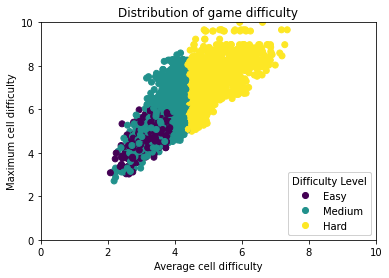

medium    2014
hard      1950
easy      1036
Name: level, dtype: int64


In [43]:
scatter = plt.scatter(x=difficulty_info["avg_cell_difficulty"], y=difficulty_info["max_cell_difficulty"], c=difficulty_info["level"])
plt.xlabel("Average cell difficulty")
plt.ylabel("Maximum cell difficulty")
plt.title("Distribution of game difficulty")
plt.xlim([0,10])
plt.ylim([0,10])
ax = plt.gca()
legend = ax.legend(scatter.legend_elements()[0], ["Easy", "Medium", "Hard"], loc="lower right", title="Difficulty Level")
ax.add_artist(legend)
plt.show()

print(difficulty_info["level"].value_counts())

In [44]:
cell_info = estimator.cell_info
cell_info.nsmallest(20, "difficulty")

,row_cat,row_val,col_cat,col_val,contents,alt_contents,size,row_difficulty,col_difficulty,row_col_difficulty,solution_difficulty,difficulty
1790,flag_colors,White,flag_colors,Red,"[AE, AF, AG, AT, AU, AZ, BG, BH, BI, BN, BY, B...","[PT, UG, UZ, VE]",104,0.300218,0.000000,0.000000,0.000000,0.000000
1756,flag_colors,Red,flag_colors,Blue,"[AD, AG, AM, AU, AZ, BZ, CD, CF, CL, CO, CR, C...","[ME, PT, UZ]",64,0.000000,1.650775,0.739143,0.646613,0.703377
1757,flag_colors,White,flag_colors,Blue,"[AG, AR, AU, AZ, BA, BR, BW, BZ, CF, CL, CR, C...","[PT, VE]",73,0.300218,1.650775,0.903449,0.524250,0.724667
131,flag_colors,Red,continent,AS,"[AE, AF, AM, AZ, BD, BH, BN, CN, GE, ID, IQ, I...","[EG, RU, UZ]",39,0.000000,1.393250,0.598203,0.859845,0.740071
1794,top_20_population,True,flag_colors,Red,"[BD, CD, CN, DE, EG, ET, FR, ID, IR, JP, MX, P...",[],16,2.241273,0.000000,1.062316,0.722754,0.906060
132,flag_colors,White,continent,AS,"[AE, AF, AZ, BH, BN, BT, GE, ID, IL, IN, IQ, I...","[EG, RU]",38,0.300218,1.393250,0.762509,1.211368,1.001894
1803,top_20_population,True,flag_colors,White,"[BR, EG, FR, ID, IN, IR, JP, MX, NG, PH, PK, R...",[],14,2.241273,0.300218,1.226621,0.758038,1.007367
202,flag_colors,Red,continent,EU,"[AD, AL, AT, BE, BG, BY, CH, CZ, DE, DK, ES, F...","[AM, AZ, GE]",36,0.000000,1.335214,0.566440,1.428321,1.012494
1796,top_20_area,True,flag_colors,Red,"[AU, CA, CD, CN, DZ, ID, IR, LY, MN, MX, PE, R...",[],15,2.483127,0.000000,1.194679,0.818073,1.021626
1791,flag_colors,Yellow/Gold,flag_colors,Red,"[AD, AG, AO, BE, BF, BJ, BN, BO, CD, CF, CG, C...","[FI, PT, PY, RS, SI, TM]",63,2.599234,0.000000,1.258223,0.848860,1.069506


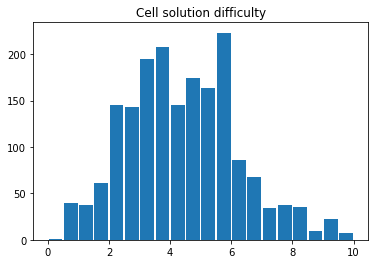

In [45]:
plt.hist(cell_info["solution_difficulty"], bins=20, rwidth=.9)
plt.title("Cell solution difficulty")
plt.show()

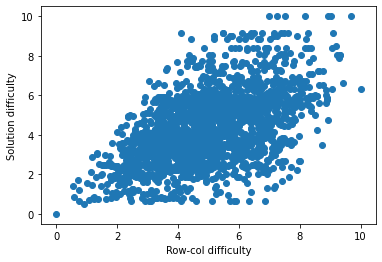

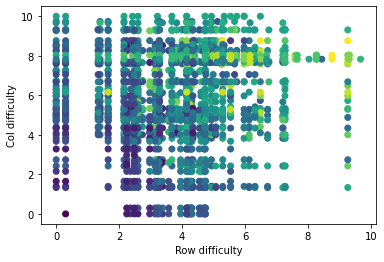

In [46]:
plt.scatter(x=cell_info["row_col_difficulty"], y=cell_info["solution_difficulty"])
plt.xlabel("Row-col difficulty")
plt.ylabel("Solution difficulty")
plt.show()

plt.scatter(x=cell_info["row_difficulty"], y=cell_info["col_difficulty"], c=cell_info["solution_difficulty"])
plt.xlabel("Row difficulty")
plt.ylabel("Col difficulty")
plt.show()
# plt.scatter(x=cell_info["row_col_difficulty"], y=cell_info["row_col_difficulty_harmonic"])
# plt.show()

In [47]:
# difficulty_info.nlargest(10, "difficulty")

In [48]:


# plt.scatter(x=np.log(df["gdp"]) - np.log(df["population"]), y=df["gdp_per_capita"])
# plt.scatter(x=np.log(df["population"]), y=np.log(df["gdp"]), c=df["difficulty"])
# plt.scatter(x=np.log(df["population"]), y=np.log(df["gdp"]), c=df["difficulty"])
# plt.show()